### Incidents type analysis from last six months 

recognise the logistics of specific data, are you able to assist by providing me with any high level data of incidents by type or by duration for the last 6 months?

- Peak hour, arterial road  
- Non–peak, arterial road  
- Peak hour, motor way  
- Non-peak, motor way 
Or by duration:
- Peak hour, arterial road, 0-3 hours  
- Peak hour, arterial road, 3+ hours  


For Mel P (31/01/2019)

In [18]:
import pandas as pd
incidents=pd.read_csv('5e842a5d-9ce0-40ae-8c97-604e5ce153d1.csv')  #logged time 11/08/2010-12/08/2012 = 2years
incidents.describe()
incidents.head()
#ncidents.tail()

,coordinates,road,Region,type,loggedtime,blockagetype,Hour(HH.MM),Hour(HH.H)
0,"145.242458668,-17.6613188854",KENNEDY HIGHWAY,NaN,Planned Event/Roadworks,11/08/2010 10:20,No Blockage,10.20,10.3
1,"145.496414185,-17.6104373932",KENNEDY HIGHWAY,NaN,Planned Event/Roadworks,22/10/2010 16:04,Partially Blocked,16.04,16.1
2,"153.010772705,-27.4678230286",BOOMERANG STREET,NaN,Stationary Vehicle,1/01/2011 1:33,Unknown,1.33,1.6
3,"153.069381714,-27.5534038544",PACIFIC MOTORWAY,NaN,Stationary Vehicle,1/01/2011 1:46,Unknown,1.46,1.8
4,"153.282180786,-27.8170452118",PACIFIC MOTORWAY,NaN,Crash,1/01/2011 1:52,Unknown,1.52,1.9


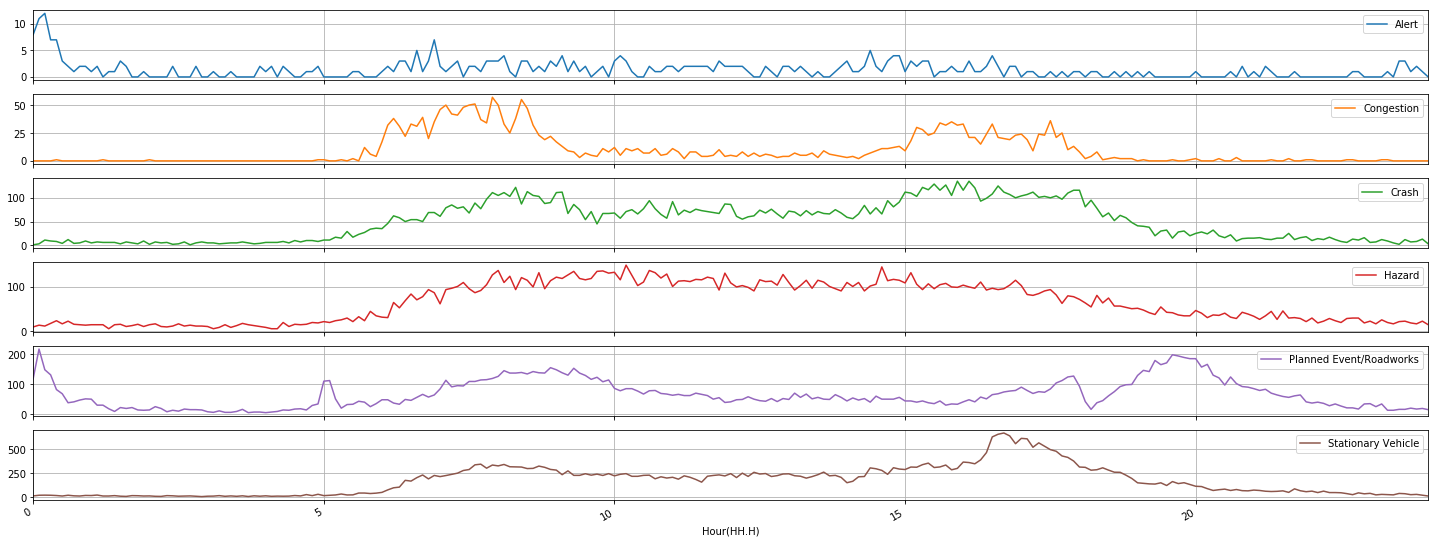

In [48]:
### The below pivot table highlights crash/congestion and stationary vehicles.
#### Hazard and planned activity and alerts have a different shape/trend
incidents['Indicator'] = 1
incidents.pivot_table(
    index = 'Hour(HH.H)',
    columns ='type',
    values = 'Indicator',   aggfunc='sum', fill_value=0).plot(subplots=True, figsize=(25,10), grid= True);

#incidents_counts=incidents.groupby('Hour(HH.H)').count()
#incidents_counts['Hour(HH.MM)'].plot(kind='bar',subplots=True, figsize=(60,5), grid= True);

In [37]:
### Add add column to determining arterial or hwy road
## regex keyword search containing 'motorway' or 'highway' and 'ramp'
mask = incidents['road'].str.contains('MOTORWAY|HIGHWAY|RAMP', na=False)
incidents['Highway']= incidents['road'].str.contains('MOTORWAY|HIGHWAY|RAMP', na=False) #sets the column Highway
hwy_incidents = incidents.loc[mask] #hwy_incidents
arterial_incidents= incidents.loc[~mask] #arterial_incidents

,coordinates,road,Region,type,loggedtime,blockagetype,Hour(HH.MM),Hour(HH.H),Highway,Indicator
0,"145.242458668,-17.6613188854",KENNEDY HIGHWAY,NaN,Planned Event/Roadworks,11/08/2010 10:20,No Blockage,10.20,10.3,True,1
1,"145.496414185,-17.6104373932",KENNEDY HIGHWAY,NaN,Planned Event/Roadworks,22/10/2010 16:04,Partially Blocked,16.04,16.1,True,1
2,"153.010772705,-27.4678230286",BOOMERANG STREET,NaN,Stationary Vehicle,1/01/2011 1:33,Unknown,1.33,1.6,False,1
3,"153.069381714,-27.5534038544",PACIFIC MOTORWAY,NaN,Stationary Vehicle,1/01/2011 1:46,Unknown,1.46,1.8,True,1
4,"153.282180786,-27.8170452118",PACIFIC MOTORWAY,NaN,Crash,1/01/2011 1:52,Unknown,1.52,1.9,True,1
5,"153.282180786,-27.8170452118",PACIFIC MOTORWAY,NaN,Hazard,1/01/2011 2:32,Unknown,2.32,2.5,True,1
6,"153.409698486,-27.9616641998",NORTH STREET,NaN,Crash,1/01/2011 2:34,Unknown,2.34,2.6,False,1
7,"153.351165771,-28.026714325",PACIFIC HIGHWAY,NaN,Stationary Vehicle,1/01/2011 2:59,Unknown,2.59,3.0,True,1
8,"153.055099487,-26.7745513916",CALOUNDRA ROAD,NaN,Hazard,1/01/2011 4:55,Unknown,4.55,4.9,False,1
9,"153.334594727,-27.9911365509",WHITE STREET,NaN,Planned Event/Roadworks,1/01/2011 5:09,Unknown,5.09,5.2,False,1


Text(0, 0.5, 'incident count')

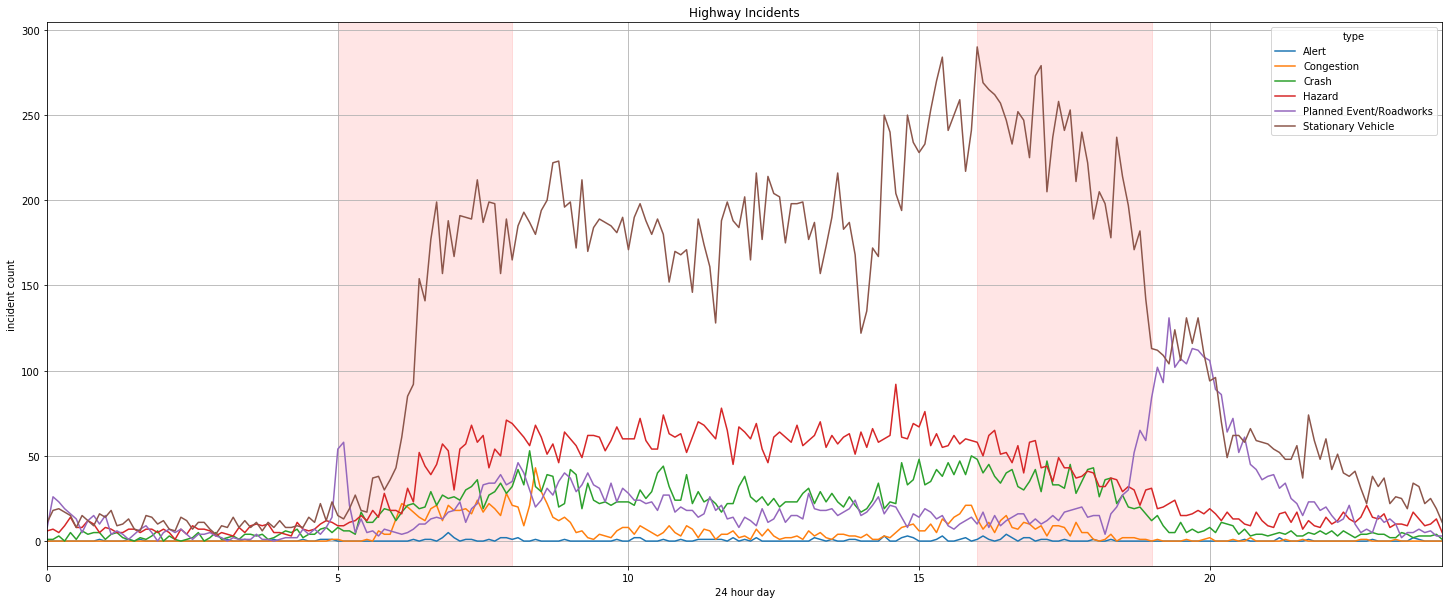

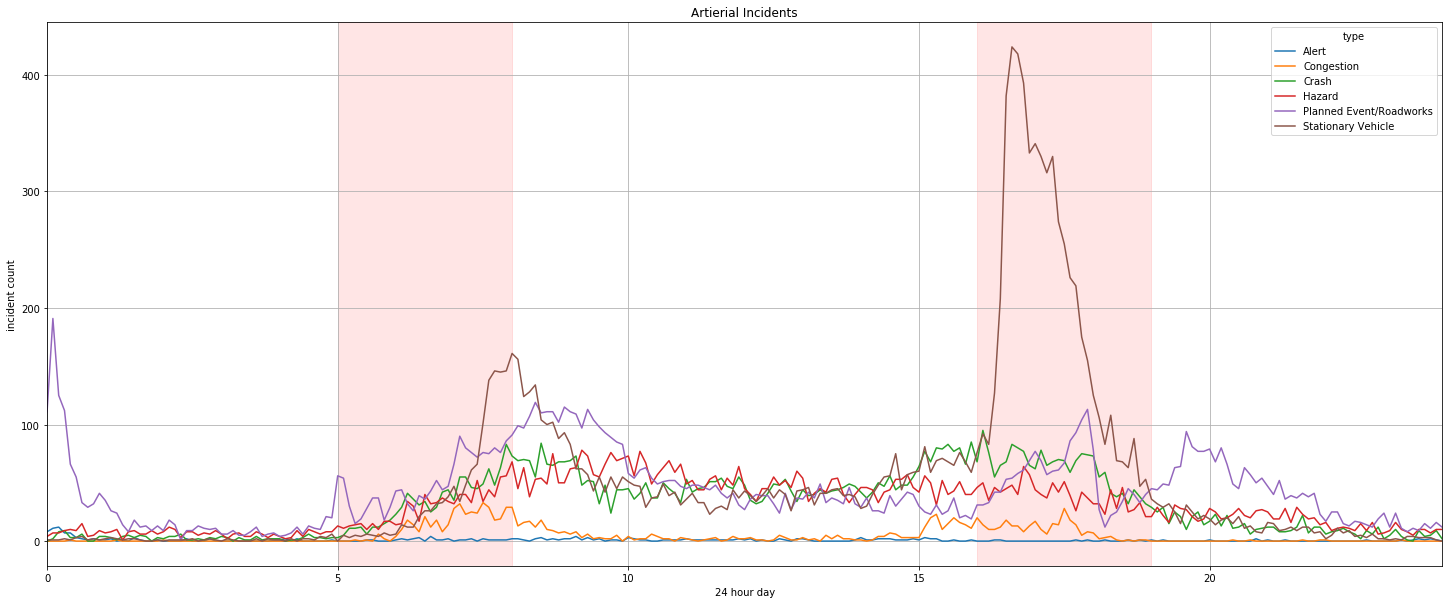

In [126]:
hwy_incidents.pivot_table(
    index = 'Hour(HH.H)',
    columns ='type',
    values = 'Indicator',   aggfunc=sum, fill_value=0).plot(subplots=False,  figsize=(25,10), grid= True, title='Highway Incidents');
plt.axvspan(5, 8, alpha=0.1, color='red')
plt.axvspan(16, 19, alpha=0.1, color='red')
plt.xlabel('24 hour day')
plt.ylabel('incident count')

arterial_incidents.pivot_table(
    index = 'Hour(HH.H)',
    columns ='type',
    values = 'Indicator',   aggfunc=sum, fill_value=0).plot(subplots=False,  figsize=(25,10), grid= True, title='Artierial Incidents');
plt.axvspan(5, 8, alpha=0.1, color='red')
plt.axvspan(16, 19, alpha=0.1, color='red')
plt.xlabel('24 hour day')
plt.ylabel('incident count')

Text(0, 0.5, 'incident count')

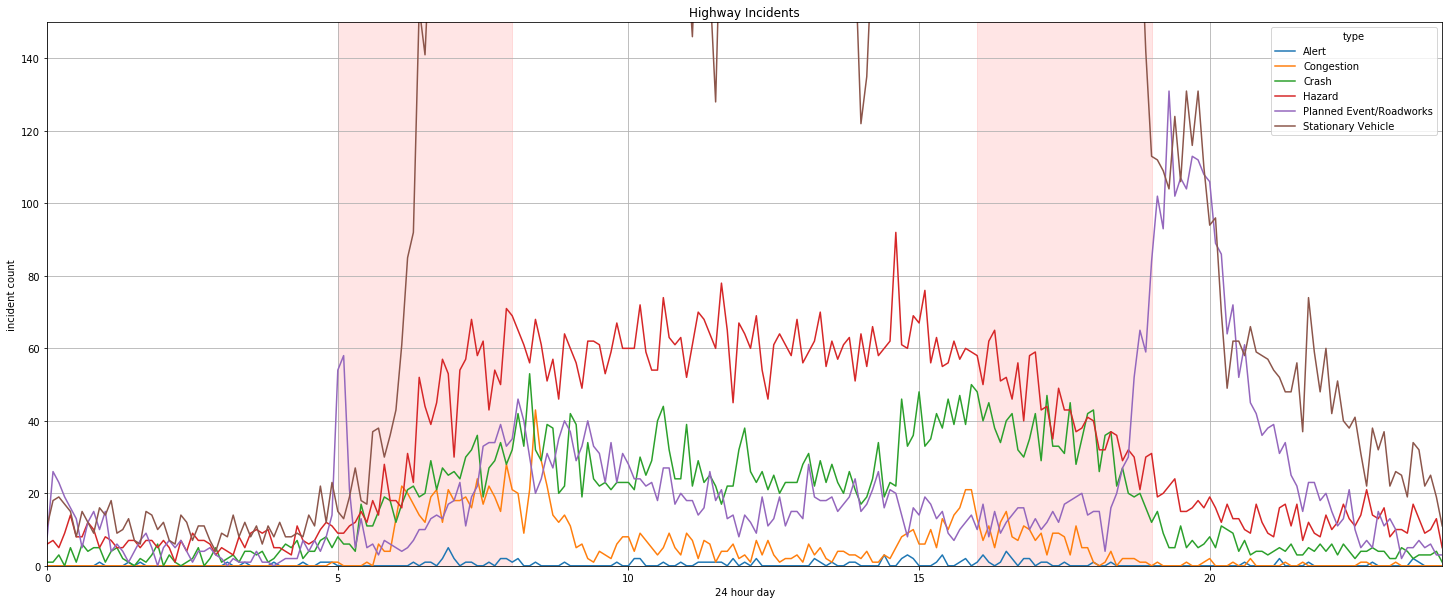

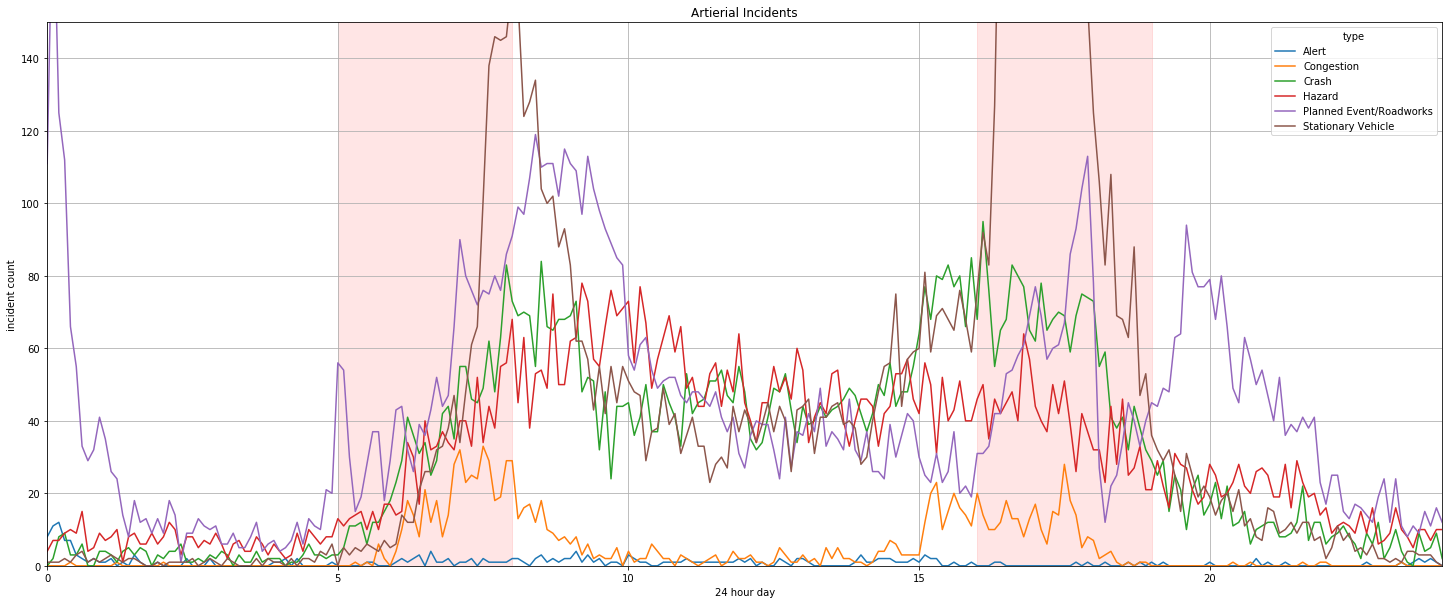

In [131]:
hwy_incidents.pivot_table(
    index = 'Hour(HH.H)',
    columns ='type',
    values = 'Indicator',   aggfunc=sum, fill_value=0).plot(subplots=False,  figsize=(25,10), grid= True, title='Highway Incidents');
plt.axvspan(5, 8, alpha=0.1, color='red')
plt.ylim(0, 150)
plt.axvspan(16, 19, alpha=0.1, color='red')
plt.xlabel('24 hour day')
plt.ylabel('incident count')


arterial_incidents.pivot_table(
    index = 'Hour(HH.H)',
    columns ='type',
    values = 'Indicator',   aggfunc=sum, fill_value=0).plot(subplots=False,  figsize=(25,10), grid= True, title='Artierial Incidents');
plt.axvspan(5, 8, alpha=0.1, color='red')
plt.axvspan(16, 19, alpha=0.1, color='red')
plt.ylim(0, 150)
plt.xlabel('24 hour day')
plt.ylabel('incident count')

In [197]:
#assign hour to nearest hour
incidents['Hour(HH)'] = round(incidents['Hour(HH.H)'],0).astype(int)

#assign on and off peak hours
incidents['Peak_Hour'] = (incidents['Hour(HH.H)'] >=5) & (incidents['Hour(HH.H)'] <= 8) | (incidents['Hour(HH.H)'] >= 16) & (incidents['Hour(HH.H)'] <= 19)
incidents

,coordinates,road,Region,type,loggedtime,blockagetype,Hour(HH.MM),Hour(HH.H),Highway,Indicator,Peak_Hour,Hour(HH)
0,"145.242458668,-17.6613188854",KENNEDY HIGHWAY,NaN,Planned Event/Roadworks,11/08/2010 10:20,No Blockage,10.20,10.3,True,1,False,10
1,"145.496414185,-17.6104373932",KENNEDY HIGHWAY,NaN,Planned Event/Roadworks,22/10/2010 16:04,Partially Blocked,16.04,16.1,True,1,True,16
2,"153.010772705,-27.4678230286",BOOMERANG STREET,NaN,Stationary Vehicle,1/01/2011 1:33,Unknown,1.33,1.6,False,1,False,2
3,"153.069381714,-27.5534038544",PACIFIC MOTORWAY,NaN,Stationary Vehicle,1/01/2011 1:46,Unknown,1.46,1.8,True,1,False,2
4,"153.282180786,-27.8170452118",PACIFIC MOTORWAY,NaN,Crash,1/01/2011 1:52,Unknown,1.52,1.9,True,1,False,2
5,"153.282180786,-27.8170452118",PACIFIC MOTORWAY,NaN,Hazard,1/01/2011 2:32,Unknown,2.32,2.5,True,1,False,2
6,"153.409698486,-27.9616641998",NORTH STREET,NaN,Crash,1/01/2011 2:34,Unknown,2.34,2.6,False,1,False,3
7,"153.351165771,-28.026714325",PACIFIC HIGHWAY,NaN,Stationary Vehicle,1/01/2011 2:59,Unknown,2.59,3.0,True,1,False,3
8,"153.055099487,-26.7745513916",CALOUNDRA ROAD,NaN,Hazard,1/01/2011 4:55,Unknown,4.55,4.9,False,1,False,5
9,"153.334594727,-27.9911365509",WHITE STREET,NaN,Planned Event/Roadworks,1/01/2011 5:09,Unknown,5.09,5.2,False,1,True,5


In [198]:
incidents_statistic =incidents.groupby(['Hour(HH)','type','Highway','Peak_Hour'])['Indicator'].count()
incidents_statistic

Hour(HH)  type                     Highway  Peak_Hour
0         Alert                    False    False         48
          Congestion               False    False          1
          Crash                    False    False         25
                                   True     False         11
          Hazard                   False    False         41
                                   True     False         54
          Planned Event/Roadworks  False    False        651
                                   True     False        114
          Stationary Vehicle       False    False          9
                                   True     False         88
1         Alert                    False    False         10
                                   True     False          2
          Congestion               False    False          1
          Crash                    False    False         27
                                   True     False         33
          Hazard               

In [199]:
#send out to csv
incidents.to_csv('statistics_by_typeRoadPeak.csv', sep=',')
incidents_statistic.to_csv('statistics_by_typeRoadPeak_pivot.csv', sep=',')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
incidents_statistic

Hour(HH)  type                     Highway  Peak_Hour
0         Alert                    False    False         48
          Congestion               False    False          1
          Crash                    False    False         25
                                   True     False         11
          Hazard                   False    False         41
                                   True     False         54
          Planned Event/Roadworks  False    False        651
                                   True     False        114
          Stationary Vehicle       False    False          9
                                   True     False         88
1         Alert                    False    False         10
                                   True     False          2
          Congestion               False    False          1
          Crash                    False    False         27
                                   True     False         33
          Hazard               